In [1]:
# import required modules
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
import time
from sklearn.model_selection import RandomizedSearchCV
import joblib

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = 'hdb-resale-price.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining
0,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-05,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,01 TO 05,68.0,Improved,1979,383000.0,66
1,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-07,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,10 TO 12,68.0,Improved,1979,380000.0,66
2,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-08,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,04 TO 06,68.0,Improved,1979,378000.0,66
3,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-08,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,10 TO 12,68.0,Improved,1979,388000.0,66
4,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-11,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,10 TO 12,68.0,Improved,1979,387000.0,66


In [3]:
df.sample(10)

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining
35165,1.354971,103.750400,650535.0,535 BT BATOK ST 52,Bukit Gombak MRT Station,441.632829,13763.279819,2012-08,BUKIT BATOK,EXECUTIVE,535,BT BATOK ST 52,01 TO 03,146.0,Maisonette,1987,608000.0,74
31010,1.378178,103.737107,680470.0,470 CHOA CHU KANG AVE 3,Choa Chu Kang MRT Station,1133.457723,16500.453185,2014-02,CHOA CHU KANG,4 ROOM,470,CHOA CHU KANG AVE 3,01 TO 03,101.0,Model A,1999,390000.0,84
1612,1.330232,103.909387,470108.0,108 BEDOK RESERVOIR RD,Kaki Bukit MRT Station,535.821864,8310.626868,2014-04,BEDOK,3 ROOM,108,BEDOK RESERVOIR RD,07 TO 09,70.0,New Generation,1985,330000.0,70
49223,1.347446,103.692828,640852.0,852 JURONG WEST ST 81,Pioneer MRT Station,1199.411000,19021.691007,2014-11,JURONG WEST,4 ROOM,852,JURONG WEST ST 81,07 TO 09,107.0,Model A,1996,360000.0,81
24013,1.325982,103.899673,400346.0,346 UBI AVE 1,Ubi MRT Station,444.272151,7181.244854,2014-04,GEYLANG,4 ROOM,346,UBI AVE 1,07 TO 09,104.0,Model A,1986,440000.0,71
38771,1.419304,103.835329,760617.0,617 YISHUN RING RD,Khatib MRT Station,336.818111,15176.294320,2013-10,YISHUN,3 ROOM,617,YISHUN RING RD,01 TO 03,73.0,Model A,1988,328000.0,74
22652,1.368307,103.895988,530327.0,327 HOUGANG AVE 5,Hougang MRT Station,519.730362,10663.539891,2012-11,HOUGANG,3 ROOM,327,HOUGANG AVE 5,04 TO 06,67.0,New Generation,1983,336000.0,70
41878,1.339206,103.703397,641664.0,664A JURONG WEST ST 64,Boon Lay MRT Station,289.564073,17594.405366,2014-02,JURONG WEST,4 ROOM,664A,JURONG WEST ST 64,10 TO 12,91.0,Model A,2000,455000.0,85
27866,1.375686,103.896284,530416.0,416 HOUGANG AVE 10,Hougang MRT Station,651.689877,11406.070918,2012-04,HOUGANG,5 ROOM,416,HOUGANG AVE 10,06 TO 10,120.0,Improved,1985,512000.0,72
20170,1.344041,103.735500,600301.0,301 JURONG EAST ST 32,Chinese Garden MRT Station,363.321544,14547.970223,2013-04,JURONG EAST,3 ROOM,301,JURONG EAST ST 32,01 TO 03,84.0,New Generation,1983,390000.0,69


In [4]:
df.shape

(52203, 18)

In [5]:
# Print the columns in the dataset
list(df.columns)

['latitude',
 'longitude',
 'postal_code',
 'address',
 'closest_mrt',
 'closest_mrt_dist',
 'cbd_dist',
 'month',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date',
 'resale_price',
 'years_remaining']

In [6]:
# Print the last 5 rows of the dataset
df.tail()

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining
52198,1.338745,103.847253,311099.0,99B LOR 2 TOA PAYOH,Braddell MRT Station,197.208781,6180.426023,2014-09,TOA PAYOH,EXECUTIVE,99B,LOR 2 TOA PAYOH,10 TO 12,145.0,Apartment,1993,850000.0,78
52199,1.339016,103.847449,312099.0,99C LOR 2 TOA PAYOH,Braddell MRT Station,176.198624,6208.782458,2012-03,TOA PAYOH,EXECUTIVE,99C,LOR 2 TOA PAYOH,11 TO 15,149.0,Apartment,1993,862000.0,80
52200,1.339016,103.847449,312099.0,99C LOR 2 TOA PAYOH,Braddell MRT Station,176.198624,6208.782458,2012-06,TOA PAYOH,EXECUTIVE,99C,LOR 2 TOA PAYOH,04 TO 06,148.0,Apartment,1993,820000.0,80
52201,1.339016,103.847449,312099.0,99C LOR 2 TOA PAYOH,Braddell MRT Station,176.198624,6208.782458,2013-10,TOA PAYOH,EXECUTIVE,99C,LOR 2 TOA PAYOH,10 TO 12,148.0,Apartment,1993,905000.0,79
52202,1.339016,103.847449,312099.0,99C LOR 2 TOA PAYOH,Braddell MRT Station,176.198624,6208.782458,2013-12,TOA PAYOH,EXECUTIVE,99C,LOR 2 TOA PAYOH,07 TO 09,145.0,Apartment,1993,845000.0,79


In [7]:
# Print the size of the dataset
print(df.size)

939654


In [8]:
# Print the data types of the dataset

print(df.dtypes)

latitude               float64
longitude              float64
postal_code            float64
address                 object
closest_mrt             object
closest_mrt_dist       float64
cbd_dist               float64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
years_remaining          int64
dtype: object


In [9]:
# Print the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             52199 non-null  float64
 1   longitude            52199 non-null  float64
 2   postal_code          52196 non-null  float64
 3   address              52203 non-null  object 
 4   closest_mrt          52199 non-null  object 
 5   closest_mrt_dist     52199 non-null  float64
 6   cbd_dist             52199 non-null  float64
 7   month                52203 non-null  object 
 8   town                 52203 non-null  object 
 9   flat_type            52203 non-null  object 
 10  block                52203 non-null  object 
 11  street_name          52203 non-null  object 
 12  storey_range         52203 non-null  object 
 13  floor_area_sqm       52203 non-null  float64
 14  flat_model           52203 non-null  object 
 15  lease_commence_date  52203 non-null 

In [10]:
# Display summary statistics

df.describe()

,latitude,longitude,postal_code,closest_mrt_dist,cbd_dist,floor_area_sqm,lease_commence_date,resale_price,years_remaining
count,52199.000000,52199.000000,52196.000000,52199.000000,52199.000000,52203.000000,52203.000000,5.220300e+04,52203.000000
mean,1.364831,103.837080,544391.622768,755.305385,12412.061697,96.203285,1989.512902,4.612147e+05,75.587878
std,0.043318,0.073685,183572.080847,424.154938,4528.507318,24.984010,10.139550,1.225534e+05,10.183453
min,1.270380,103.685228,50004.000000,31.759821,592.121638,31.000000,1966.000000,1.950000e+05,52.000000
25%,1.335408,103.773674,470101.000000,446.270741,9478.343681,73.000000,1983.000000,3.700000e+05,68.000000
50%,1.358876,103.840736,560112.000000,681.337334,13182.791793,95.000000,1988.000000,4.400000e+05,74.000000
75%,1.389901,103.896538,680014.250000,964.557032,16082.019965,111.000000,1999.000000,5.250000e+05,85.000000
max,1.457071,103.987804,825195.000000,3496.402761,20225.103698,266.000000,2012.000000,1.088888e+06,98.000000


In [11]:
# groupby "type" and apply .size() function to count the number of rows for each type of flat

df_type = df.groupby('flat_type').size()

df_type.head()

flat_type
1 ROOM       40
2 ROOM      581
3 ROOM    15372
4 ROOM    20150
5 ROOM    11845
dtype: int64

In [12]:
# check for unique values in each column. This is especially useful for categorical data

df.nunique()

latitude               8022
longitude              8003
postal_code            8021
address                8025
closest_mrt              96
closest_mrt_dist       8022
cbd_dist               8022
month                    34
town                     26
flat_type                 7
block                  2047
street_name             515
storey_range             22
floor_area_sqm          163
flat_model               17
lease_commence_date      47
resale_price           2067
years_remaining          47
dtype: int64

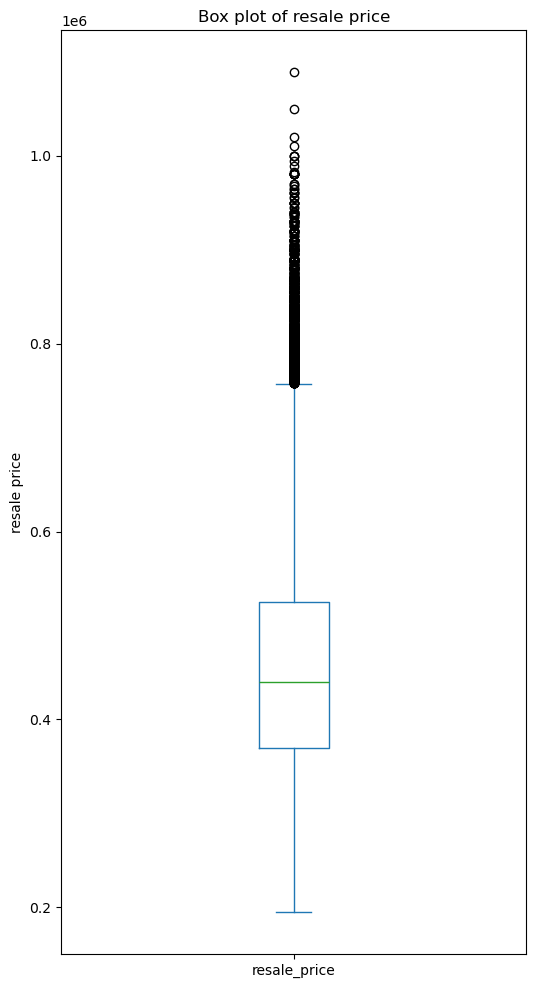

In [13]:
# Draw a Box plot to visulaise the airbnb price distribution
df["resale_price"].plot(kind="box",figsize=(6, 12))

plt.title('Box plot of resale price')
plt.ylabel('resale price')
plt.show()

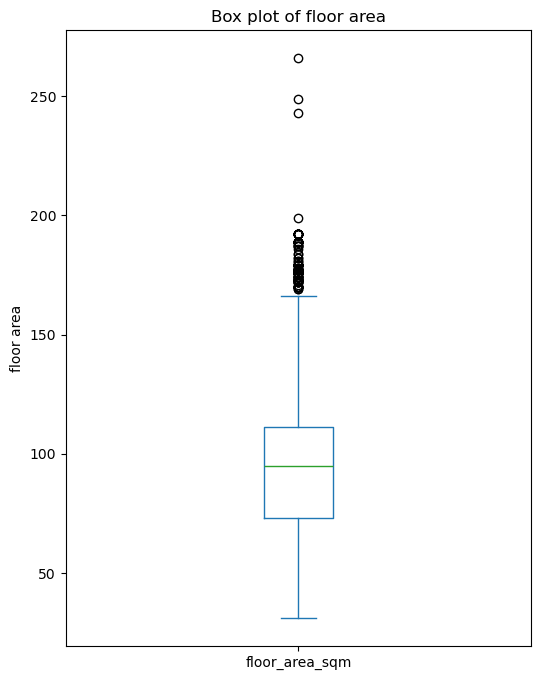

In [14]:
# Draw a Box plot to visulaise the floor area per square metre distribution

df["floor_area_sqm"].plot(kind="box",figsize=(6, 8))

plt.title('Box plot of floor area')
plt.ylabel('floor area')
plt.show()

In [15]:
# Check for duplicates
# df.duplicated() will return boolean Series denoting duplicate rows.

df[df.duplicated()]

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining
47,1.275499,103.841398,80001.0,1 EVERTON PK,Outram Park MRT Station,513.706328,1379.225999,2014-04,BUKIT MERAH,5 ROOM,1,EVERTON PK,10 TO 12,138.0,Improved,1980,751888.0,65
168,1.307871,103.883192,390001.0,1 PINE CL,Mountbatten MRT Station,198.762784,4490.042501,2014-05,GEYLANG,4 ROOM,1,PINE CL,07 TO 09,95.0,Model A,2000,590000.0,85
275,1.440806,103.777319,730010.0,10 MARSILING DR,Marsiling MRT Station,984.626290,19294.204220,2014-04,WOODLANDS,5 ROOM,10,MARSILING DR,10 TO 12,126.0,Standard,1976,418000.0,61
523,1.397847,103.906436,822101.0,101B PUNGGOL FIELD,Sengkang MRT Station,1395.766053,14103.937545,2014-02,PUNGGOL,5 ROOM,101B,PUNGGOL FIELD,16 TO 18,110.0,Improved,2002,540888.0,87
525,1.397847,103.906436,822101.0,101B PUNGGOL FIELD,Sengkang MRT Station,1395.766053,14103.937545,2014-04,PUNGGOL,5 ROOM,101B,PUNGGOL FIELD,04 TO 06,110.0,Improved,2002,498000.0,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50602,1.339116,103.686610,640902.0,902 JURONG WEST ST 91,Pioneer MRT Station,1204.048391,19350.334782,2014-04,JURONG WEST,4 ROOM,902,JURONG WEST ST 91,01 TO 03,104.0,Model A,1988,400000.0,73
50683,1.341175,103.686452,640909.0,909 JURONG WEST ST 91,Pioneer MRT Station,1273.061437,19441.077379,2014-05,JURONG WEST,4 ROOM,909,JURONG WEST ST 91,04 TO 06,104.0,Model A,1989,380000.0,74
50850,1.341455,103.687970,640914.0,914 JURONG WEST ST 91,Pioneer MRT Station,1125.181358,19292.081199,2012-05,JURONG WEST,3 ROOM,914,JURONG WEST ST 91,01 TO 05,73.0,Model A,1988,312000.0,75
51896,1.321581,103.854151,320098.0,98 WHAMPOA DR,Boon Keng MRT Station,864.461669,4277.836343,2014-03,KALLANG/WHAMPOA,3 ROOM,98,WHAMPOA DR,01 TO 03,65.0,Improved,1974,318000.0,59


In [16]:
# Remove completely identical duplicates and keep the first occurrence
df.drop_duplicates(inplace=True)

# Verify the cleaned DataFrame by displaying the duplicated rows again
df[df.duplicated()]

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining


In [17]:
df.shape

(51955, 18)

In [18]:
# Check for missing values
print(df.isnull().sum())

latitude               4
longitude              4
postal_code            7
address                0
closest_mrt            4
closest_mrt_dist       4
cbd_dist               4
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
years_remaining        0
dtype: int64


In [19]:
# Remove rows with any missing values
df= df.dropna()

In [20]:
# Check for missing values
print(df.isnull().sum())

latitude               0
longitude              0
postal_code            0
address                0
closest_mrt            0
closest_mrt_dist       0
cbd_dist               0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
years_remaining        0
dtype: int64


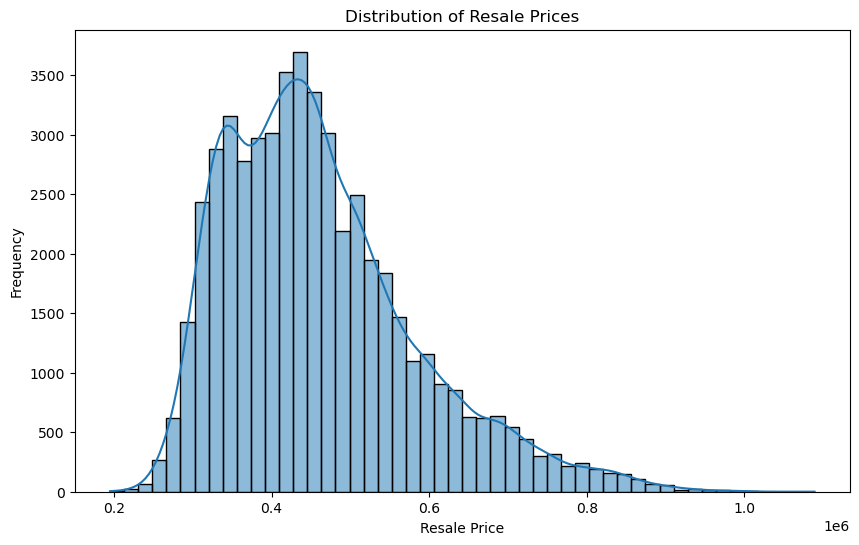

In [21]:
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['resale_price'], bins=50, kde=True)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()


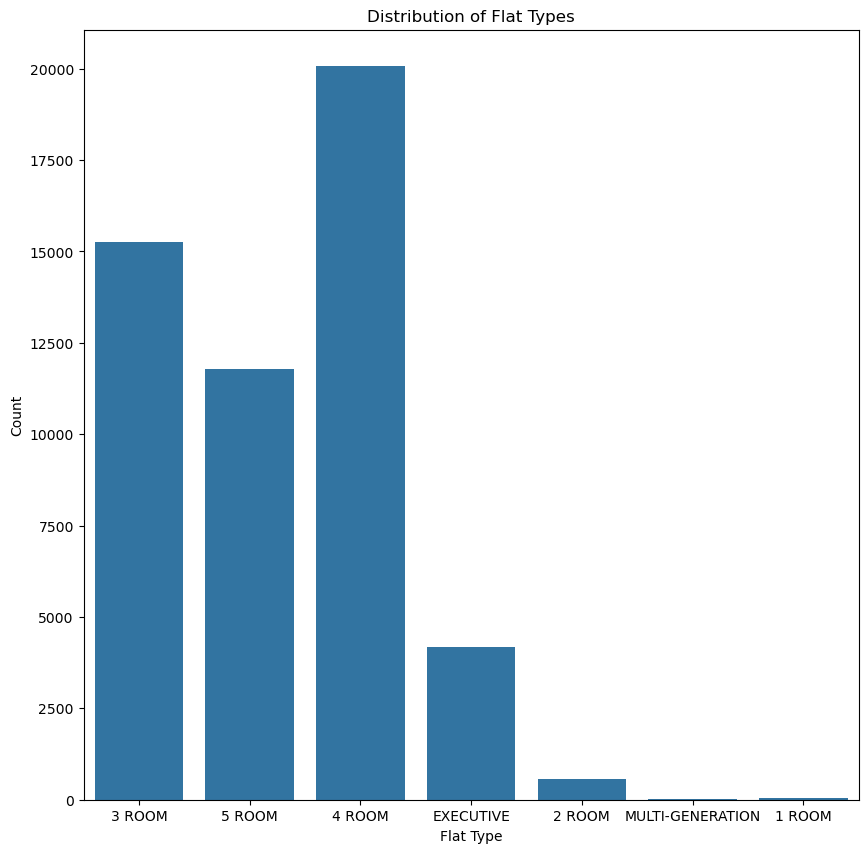

In [22]:
# Distribution of room types
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='flat_type')
plt.title('Distribution of Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Count')
plt.show()

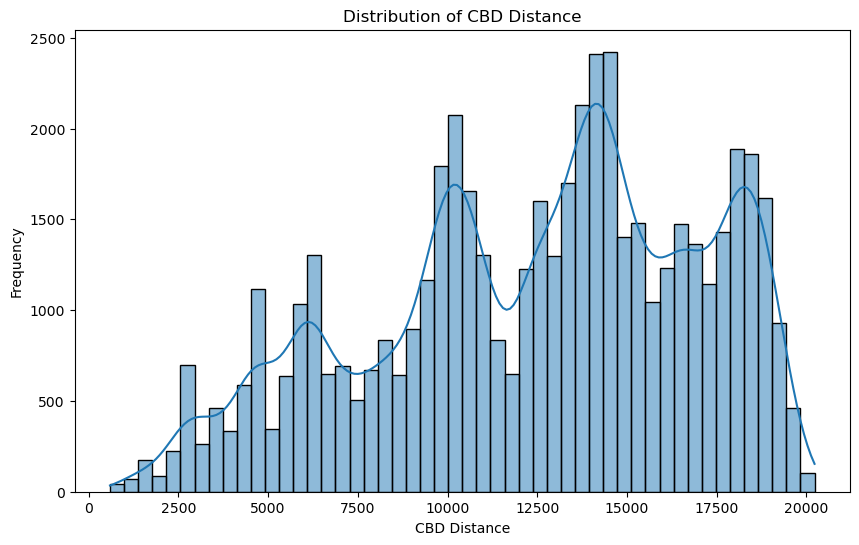

In [23]:
# Distribution of number of reviews
plt.figure(figsize=(10, 6))
sns.histplot(df['cbd_dist'], bins=50, kde=True)
plt.title('Distribution of CBD Distance')
plt.xlabel('CBD Distance')
plt.ylabel('Frequency')
plt.show()

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'postal_code'}>],
       [<Axes: title={'center': 'closest_mrt_dist'}>,
        <Axes: title={'center': 'cbd_dist'}>,
        <Axes: title={'center': 'floor_area_sqm'}>],
       [<Axes: title={'center': 'lease_commence_date'}>,
        <Axes: title={'center': 'resale_price'}>,
        <Axes: title={'center': 'years_remaining'}>]], dtype=object)

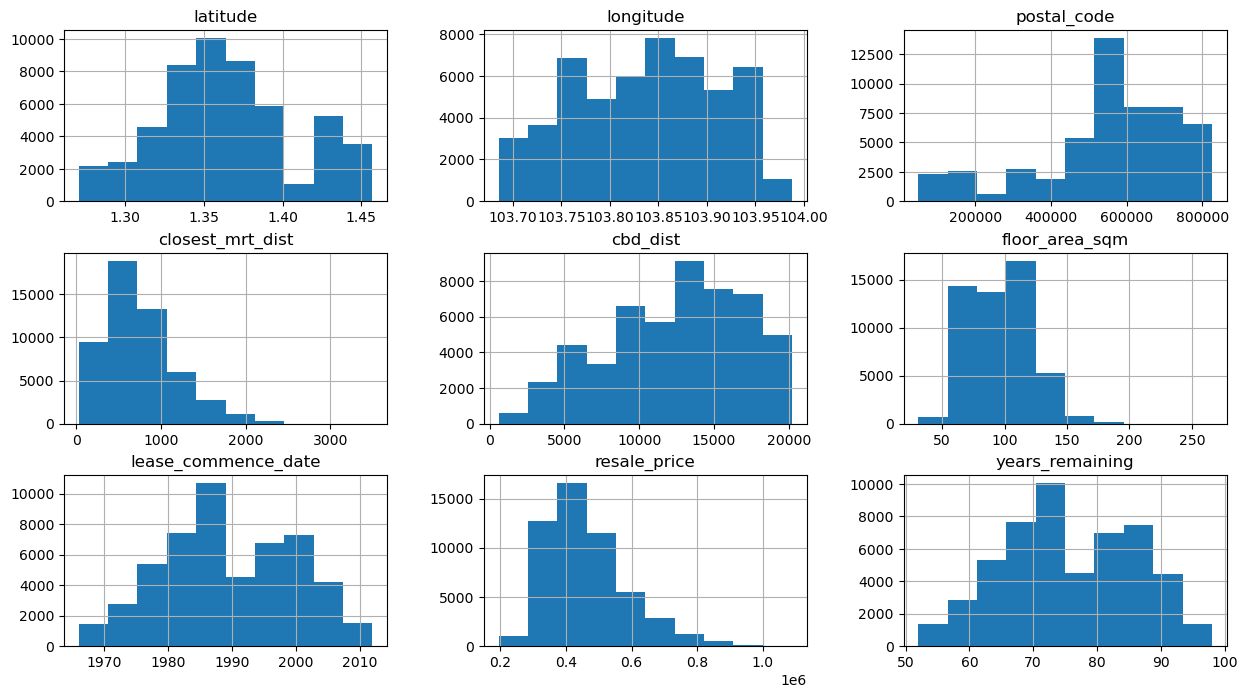

In [24]:
df.hist(figsize=(15,8))

In [25]:
df.head()

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining
0,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-05,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,01 TO 05,68.0,Improved,1979,383000.0,66
1,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-07,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,10 TO 12,68.0,Improved,1979,380000.0,66
2,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-08,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,04 TO 06,68.0,Improved,1979,378000.0,66
3,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-08,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,10 TO 12,68.0,Improved,1979,388000.0,66
4,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-11,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,10 TO 12,68.0,Improved,1979,387000.0,66


In [26]:
# Columns to be dropped
columns_to_be_dropped = [
    'address', 'block', 'street_name',
    'latitude', 'longitude', 'postal_code'
]

# Drop these columns from the encoded DataFrame
df = df.drop(columns=columns_to_be_dropped)

# Display the first few rows of the reduced DataFrame
df.sample(10)


,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining
30487,Ang Mo Kio MRT Station,998.783676,9313.554642,2014-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1980,335000.0,65
38843,Hougang MRT Station,979.020279,10257.857865,2013-03,HOUGANG,3 ROOM,04 TO 06,69.0,Improved,1985,360000.0,71
38998,Pioneer MRT Station,490.607012,18090.075755,2012-10,JURONG WEST,5 ROOM,01 TO 03,110.0,Improved,2000,480000.0,87
48504,Woodlands MRT Station,567.190284,18769.524754,2013-03,WOODLANDS,5 ROOM,01 TO 03,136.0,Model A,1996,514000.0,82
27660,Sembawang MRT Station,380.756054,19027.316028,2013-01,SEMBAWANG,5 ROOM,07 TO 09,110.0,Improved,2001,492000.0,87
3044,Canberra MRT Station,960.656039,16959.127327,2012-06,YISHUN,3 ROOM,01 TO 03,74.0,Model A,1983,310000.0,70
27828,Yishun MRT Station,1329.546331,15651.674560,2012-08,YISHUN,5 ROOM,01 TO 03,121.0,Improved,1993,459000.0,80
41404,Pioneer MRT Station,344.017320,17831.307378,2012-07,JURONG WEST,EXECUTIVE,10 TO 12,132.0,Apartment,2001,605000.0,88
19934,Buona Vista MRT Station,628.542425,7822.332055,2014-04,QUEENSTOWN,3 ROOM,13 TO 15,65.0,Improved,1976,430000.0,61
13391,Bukit Batok MRT Station,641.914786,12855.593063,2013-07,BUKIT BATOK,3 ROOM,07 TO 09,67.0,New Generation,1985,341000.0,71


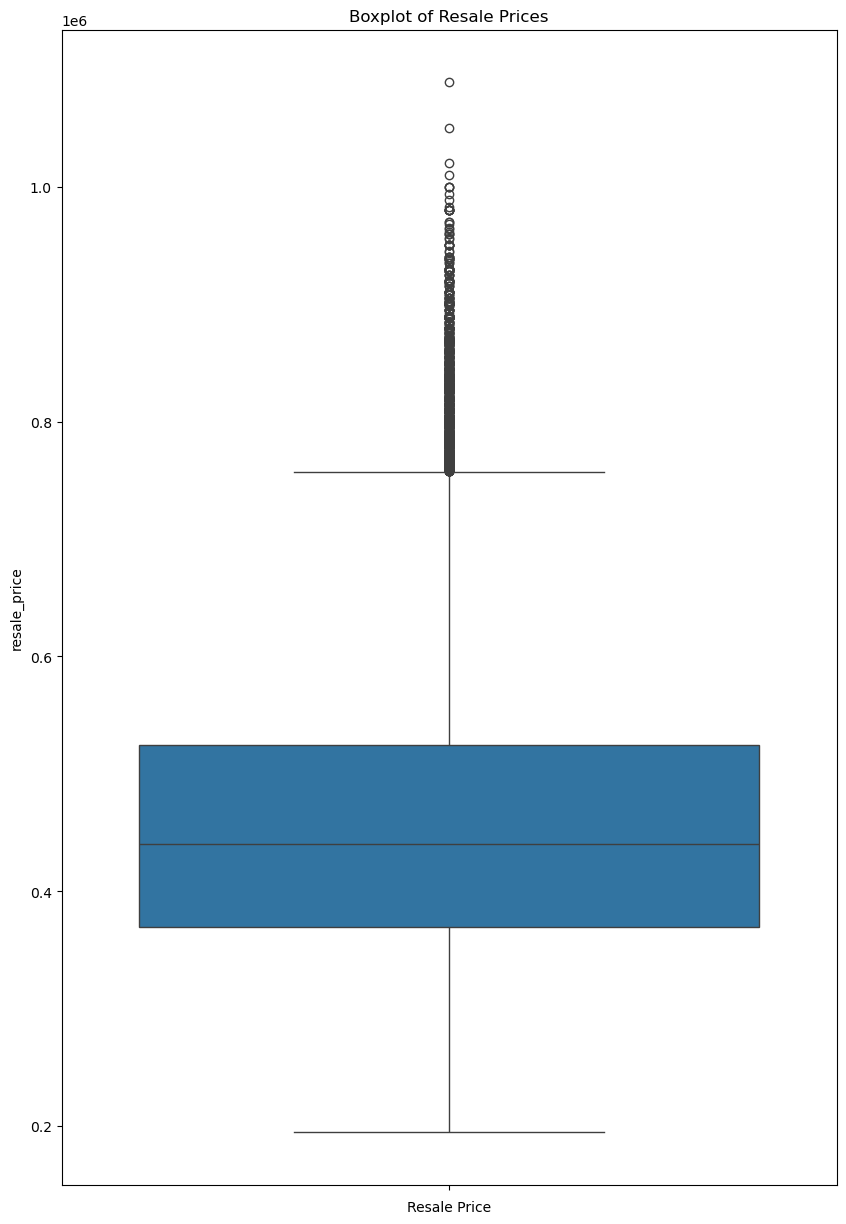

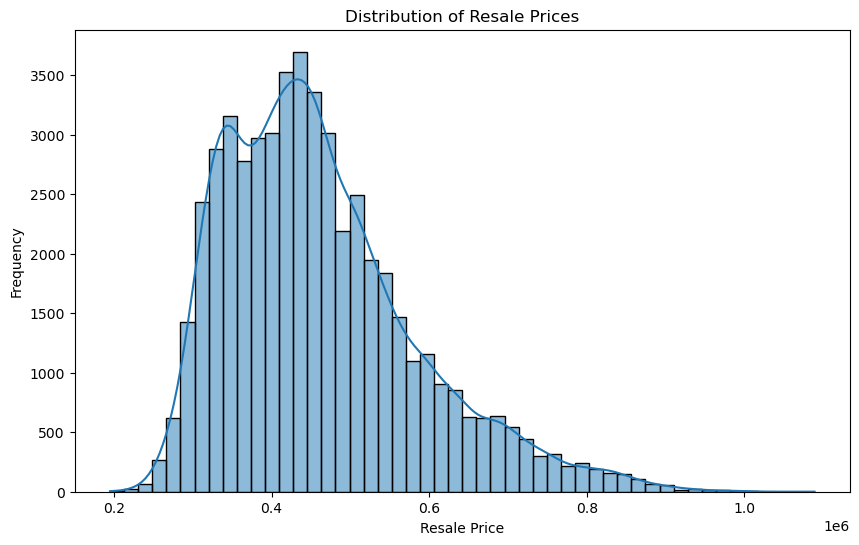

In [27]:
plt.figure(figsize=(10, 15))
sns.boxplot(df['resale_price'])
plt.title('Boxplot of Resale Prices')
plt.xlabel('Resale Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['resale_price'], bins=50, kde=True)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

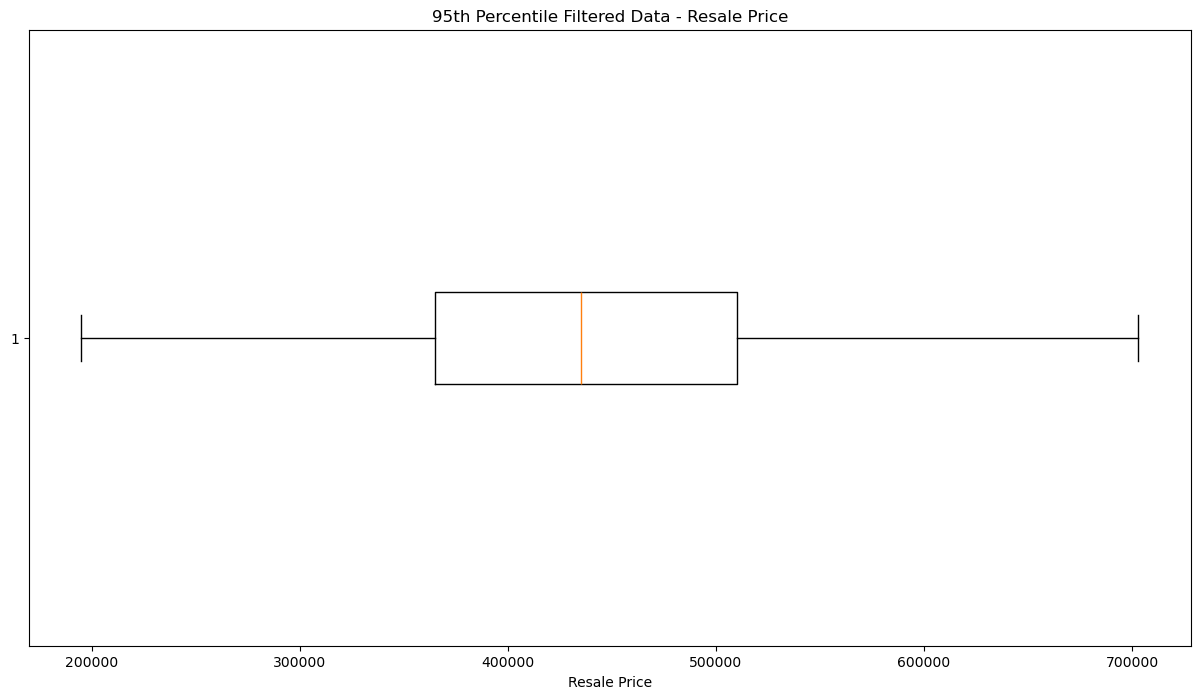

In [28]:
# Calculate the 95th percentile for 'price'
price_percentile_95 = df['resale_price'].quantile(0.95)

# Filter out outliers using the 95th percentile method for 'price', 'minimum_nights', and 'floor'
df = df[(df['resale_price'] <= price_percentile_95)]

# Plot the 95th percentile filtered data for 'price'
plt.figure(figsize=(15, 8))
plt.boxplot(df['resale_price'], vert=False)
plt.title('95th Percentile Filtered Data - Resale Price')
plt.xlabel('Resale Price')
plt.show()

In [29]:
print(df['resale_price'].skew())

0.46444568854018403


In [30]:
# Convert 'lease_commence_date' to datetime
df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date'], format='%Y')

# Extract year and month from 'lease_commence_date'
df['lease_commence_year'] = df['lease_commence_date'].dt.year
df['lease_commence_month'] = df['lease_commence_date'].dt.month
df['lease_commence_day'] = df['lease_commence_date'].dt.day

# Convert 'month' to datetime
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

# Extract year and month from 'month'
df['transaction_year'] = df['month'].dt.year
df['transaction_month'] = df['month'].dt.month
df['transaction_day'] = df['month'].dt.day

# Display the first few rows to verify the new columns
df.head()

,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining,lease_commence_year,lease_commence_month,lease_commence_day,transaction_year,transaction_month,transaction_day
0,Nicoll Highway MRT Station,441.785021,2715.822202,2012-05-01,KALLANG/WHAMPOA,3 ROOM,01 TO 05,68.0,Improved,1979-01-01,383000.0,66,1979,1,1,2012,5,1
1,Nicoll Highway MRT Station,441.785021,2715.822202,2012-07-01,KALLANG/WHAMPOA,3 ROOM,10 TO 12,68.0,Improved,1979-01-01,380000.0,66,1979,1,1,2012,7,1
2,Nicoll Highway MRT Station,441.785021,2715.822202,2012-08-01,KALLANG/WHAMPOA,3 ROOM,04 TO 06,68.0,Improved,1979-01-01,378000.0,66,1979,1,1,2012,8,1
3,Nicoll Highway MRT Station,441.785021,2715.822202,2012-08-01,KALLANG/WHAMPOA,3 ROOM,10 TO 12,68.0,Improved,1979-01-01,388000.0,66,1979,1,1,2012,8,1
4,Nicoll Highway MRT Station,441.785021,2715.822202,2012-11-01,KALLANG/WHAMPOA,3 ROOM,10 TO 12,68.0,Improved,1979-01-01,387000.0,66,1979,1,1,2012,11,1


In [31]:
# Remove 'lease_commence_date' column
df = df.drop(columns=['lease_commence_date', 'month'])

In [32]:
# Display the first few rows to confirm the column removal
df.sample(5)

,closest_mrt,closest_mrt_dist,cbd_dist,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,years_remaining,lease_commence_year,lease_commence_month,lease_commence_day,transaction_year,transaction_month,transaction_day
21075,Ang Mo Kio MRT Station,720.052681,9094.922883,ANG MO KIO,4 ROOM,13 TO 15,90.0,Model A,585000.0,91,2006,1,1,2014,1,1
31150,Ang Mo Kio MRT Station,1111.935837,8873.431388,ANG MO KIO,3 ROOM,13 TO 15,67.0,New Generation,328000.0,69,1984,1,1,2014,9,1
38539,Bedok North MRT Station,332.327594,9095.883123,BEDOK,5 ROOM,04 TO 06,128.0,Improved,450000.0,66,1981,1,1,2014,12,1
28273,Ang Mo Kio MRT Station,629.992967,9111.513850,ANG MO KIO,4 ROOM,07 TO 09,99.0,New Generation,488000.0,65,1979,1,1,2013,11,1
13420,Cashew MRT Station,1038.748384,13345.799107,BUKIT PANJANG,3 ROOM,10 TO 12,73.0,Model A,312888.0,73,1988,1,1,2014,12,1


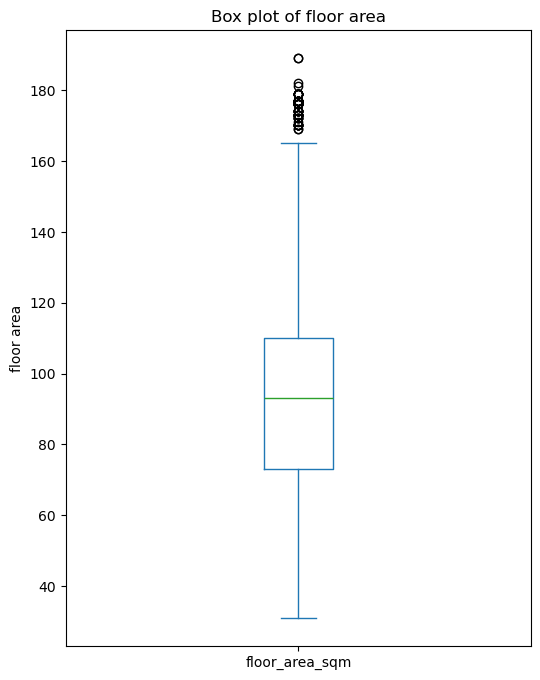

In [33]:
# Draw a Box plot to visulaise the floor area per square metre distribution
df["floor_area_sqm"].plot(kind="box",figsize=(6, 8))

plt.title('Box plot of floor area')
plt.ylabel('floor area')
plt.show()

In [34]:
# Columns to one-hot encode
categorical_columns = ['closest_mrt', 'town', 'flat_type', 'storey_range', 'flat_model']

# Apply One-Hot Encoding to the categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [35]:
# Display the first few rows of the encoded DataFrame
df.sample(5)

,closest_mrt_dist,cbd_dist,floor_area_sqm,resale_price,years_remaining,lease_commence_year,lease_commence_month,lease_commence_day,transaction_year,transaction_month,...,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Simplified,flat_model_Standard,flat_model_Terrace
6213,511.318508,8981.322403,84.0,400000.0,73,1986,1,1,2012,3,...,False,False,False,False,False,False,False,True,False,False
43347,255.000286,17388.466077,139.0,598000.0,85,1998,1,1,2012,8,...,False,False,False,False,False,False,True,False,False,False
13066,1073.852125,17083.521400,66.0,318000.0,61,1974,1,1,2012,10,...,False,False,False,False,False,False,False,False,False,False
42422,908.209755,10452.978077,84.0,385000.0,73,1986,1,1,2012,6,...,False,False,False,False,False,False,False,True,False,False
29677,479.093812,8627.675037,114.0,488000.0,77,1990,1,1,2012,5,...,False,True,False,False,False,False,False,False,False,False


In [36]:
# Define the target variable to be price
X = df.drop(['resale_price'], axis=1)
y = df['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [37]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=7),
    'Gradient Boosting': GradientBoostingRegressor(random_state=7),
    'Decision Tree': DecisionTreeRegressor(random_state=7),
    'XGBoost': xgb.XGBRegressor(random_state=7),
    'CatBoost': CatBoostRegressor(random_state=7, verbose=0)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Interpreting R2 score as accuracy for regression
    
    results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'Accuracy (%)': accuracy}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                            MAE           MSE          RMSE        R2  \
Random Forest      15575.235237  4.476349e+08  21157.384129  0.955657   
Gradient Boosting  24142.235679  1.024475e+09  32007.415796  0.898515   
Decision Tree      20903.021974  8.176315e+08  28594.256155  0.919005   
XGBoost            15061.637198  4.109619e+08  20272.196006  0.959290   
CatBoost           14438.374182  3.685280e+08  19197.083314  0.963493   

                   Accuracy (%)  
Random Forest         95.565693  
Gradient Boosting     89.851473  
Decision Tree         91.900478  
XGBoost               95.928978  
CatBoost              96.349332  


In [39]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=7),
    'XGBoost': xgb.XGBRegressor(random_state=7),
    'CatBoost': CatBoostRegressor(random_state=7, verbose=0)
}

# Perform cross-validation and evaluate models
results = {}
for model_name, model in models.items():
    cv_mae = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_mse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    results[model_name] = {
        'MAE': -cv_mae.mean(),
        'MSE': -cv_mse.mean(),
        'RMSE': np.sqrt(-cv_mse.mean()),
        'R2': cv_r2.mean(),
        'Accuracy (%)': cv_r2.mean() * 100
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                        MAE           MSE          RMSE        R2  \
Random Forest  15874.739254  4.645904e+08  21554.360278  0.953707   
XGBoost        15326.437989  4.241213e+08  20594.205344  0.957742   
CatBoost       14585.188606  3.821551e+08  19548.786897  0.961922   

               Accuracy (%)  
Random Forest     95.370736  
XGBoost           95.774178  
CatBoost          96.192241  


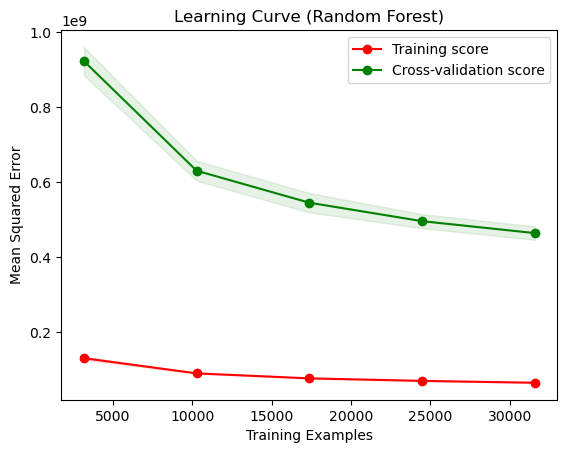

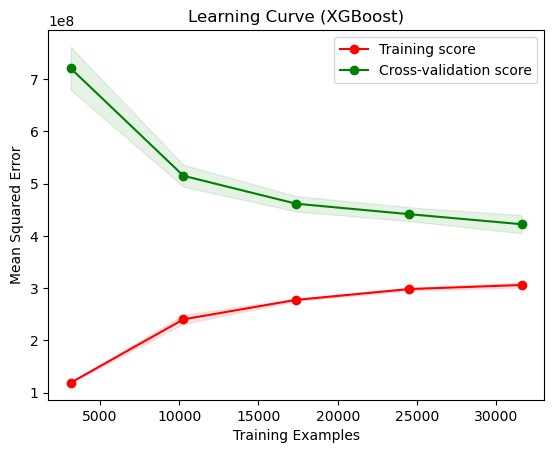

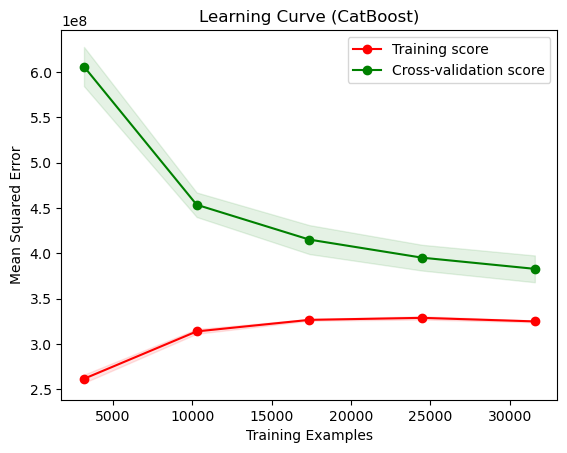

In [40]:
# Plot the learning curve for each model
def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Mean Squared Error")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.legend(loc="best")
    plt.show()

# Plot learning curves for the top 3 models
for model_name, model in models.items():
    plot_learning_curve(model, f"Learning Curve ({model_name})")

In [41]:
warnings.filterwarnings("ignore")

# Initialize models
models = {
    'XGBoost': xgb.XGBRegressor(random_state=7),
    'CatBoost': CatBoostRegressor(random_state=7, verbose=0)
}

param_grids = {
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'CatBoost': {
        'iterations': [100, 200, 300],
        'depth': [6, 10, 12],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

# Perform Randomized Search with time tracking
best_estimators = {}
elapsed_times = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    start_time = time.time()
    randomized_search = RandomizedSearchCV(
        model, param_grids[model_name], cv=5, n_iter=20, scoring='neg_mean_squared_error', n_jobs=-1, random_state=7
    )
    randomized_search.fit(X_train_scaled, y_train, early_stopping_rounds=10, eval_set=[(X_test_scaled, y_test)], verbose=0)
    end_time = time.time()
    elapsed_time = end_time - start_time
    best_estimators[model_name] = randomized_search.best_estimator_
    elapsed_times[model_name] = elapsed_time
    print(f"Best parameters for {model_name}: {randomized_search.best_params_}")
    print(f"Time elapsed for {model_name}: {elapsed_time:.2f} seconds")

# Evaluate the tuned models
results = {}
for model_name, model in best_estimators.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Interpreting R2 score as accuracy for regression
    
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'Accuracy (%)': accuracy,
        'Time Elapsed (s)': elapsed_times[model_name]
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

Tuning hyperparameters for XGBoost...


/opt/anaconda3/envs/MLDV/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/envs/MLDV/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/envs/MLDV/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/envs/MLDV/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit

Best parameters for XGBoost: {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1}
Time elapsed for XGBoost: 45.61 seconds
Tuning hyperparameters for CatBoost...
Best parameters for CatBoost: {'learning_rate': 0.2, 'iterations': 300, 'depth': 10}
Time elapsed for CatBoost: 57.94 seconds
                   MAE           MSE          RMSE        R2  Accuracy (%)  \
XGBoost   13813.025878  3.516708e+08  18752.887671  0.965163     96.516321   
CatBoost  13658.538600  3.324208e+08  18232.410273  0.967070     96.707013   

          Time Elapsed (s)  
XGBoost          45.613233  
CatBoost         57.939328  


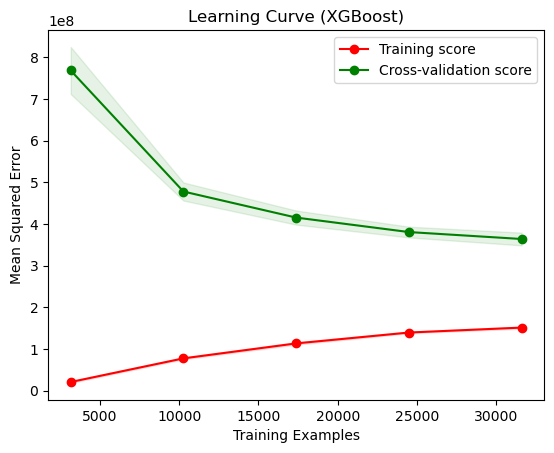

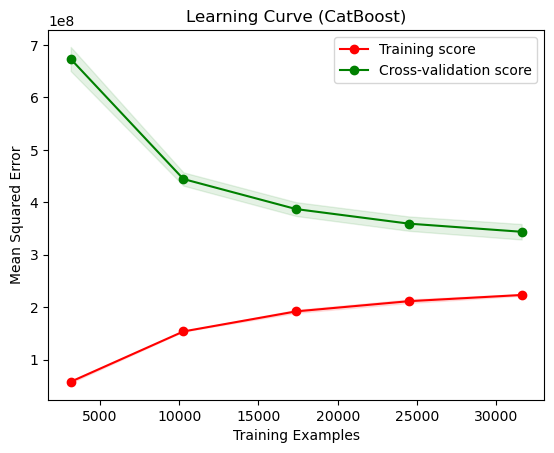

In [42]:
# Plot the learning curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Mean Squared Error")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.legend(loc="best")
    plt.show()

# Plot learning curve for XGBoost
plot_learning_curve(best_estimators['XGBoost'], X_train_scaled, y_train, "Learning Curve (XGBoost)")

# Plot learning curve for CatBoost
plot_learning_curve(best_estimators['CatBoost'], X_train_scaled, y_train, "Learning Curve (CatBoost)")

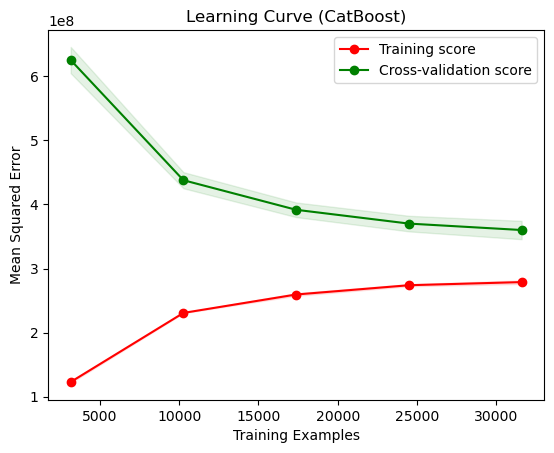

In [43]:
# Best CatBoost Model with the best found hyperparameters
best_catboost = CatBoostRegressor(
    learning_rate=0.2,
    iterations=300,
    depth=8,
    random_state=7,
    verbose=0
)

# Plot the learning curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Mean Squared Error")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.legend(loc="best")
    plt.show()

# Plot learning curve for the best CatBoost model
plot_learning_curve(best_catboost, X_train_scaled, y_train, "Learning Curve (CatBoost)")

In [44]:
df.describe()

,closest_mrt_dist,cbd_dist,floor_area_sqm,resale_price,years_remaining,lease_commence_year,lease_commence_month,lease_commence_day,transaction_year,transaction_month,transaction_day
count,49361.000000,49361.000000,49361.000000,49361.000000,49361.000000,49361.000000,49361.0,49361.0,49361.000000,49361.000000,49361.0
mean,763.941547,12667.790832,94.730735,444747.816964,75.350560,1989.269525,1.0,1.0,2012.918964,6.754766,1.0
std,423.282934,4408.233790,24.124981,100252.518243,10.104867,10.058941,0.0,0.0,0.829411,3.181326,0.0
min,31.759821,592.121638,31.000000,195000.000000,52.000000,1966.000000,1.0,1.0,2012.000000,1.000000,1.0
25%,453.449156,9803.895045,73.000000,365000.000000,68.000000,1982.000000,1.0,1.0,2012.000000,4.000000,1.0
50%,688.933264,13431.199618,93.000000,435000.000000,74.000000,1988.000000,1.0,1.0,2013.000000,7.000000,1.0
75%,976.054178,16238.744459,110.000000,510000.000000,84.000000,1998.000000,1.0,1.0,2014.000000,9.000000,1.0
max,3496.402761,20225.103698,189.000000,703000.000000,98.000000,2012.000000,1.0,1.0,2014.000000,12.000000,1.0


In [45]:
# Binarize Features
df['large_floor_area'] = (df['floor_area_sqm'] > 100).astype(int)

In [46]:
# Age of the Property
df['property_age'] = df['transaction_year'] - df['lease_commence_year']

In [47]:
# Ratio Features
df['mrt_to_cbd_distance_ratio'] = df['closest_mrt_dist'] / df['cbd_dist']

In [48]:
df.sample(5)

,closest_mrt_dist,cbd_dist,floor_area_sqm,resale_price,years_remaining,lease_commence_year,lease_commence_month,lease_commence_day,transaction_year,transaction_month,...,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,large_floor_area,property_age,mrt_to_cbd_distance_ratio
23551,895.739553,4916.163773,53.0,271000.0,57,1970,1,1,2012,7,...,False,False,False,False,False,True,False,0,42,0.182203
43139,676.550632,18278.887500,115.0,475000.0,89,2003,1,1,2013,4,...,False,False,False,True,False,False,False,1,10,0.037013
50329,674.345252,18085.233665,118.0,476000.0,82,1997,1,1,2014,6,...,False,False,False,False,False,False,False,1,17,0.037287
25917,847.384394,14362.972491,90.0,473000.0,91,2004,1,1,2012,3,...,False,False,False,False,False,False,False,0,8,0.058998
3935,340.368979,13773.785055,150.0,670000.0,72,1985,1,1,2012,6,...,False,False,False,False,False,False,False,1,27,0.024711


In [49]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

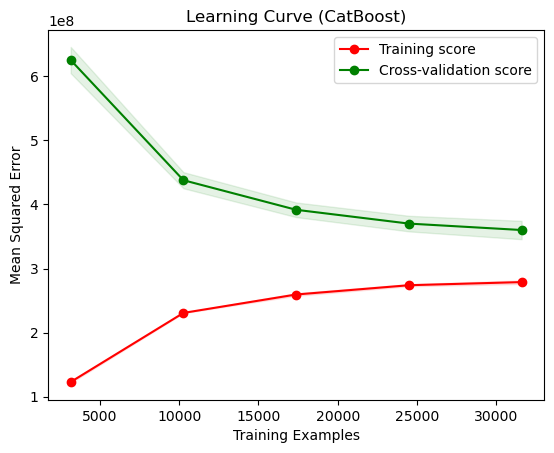

In [50]:
# Best CatBoost Model with the best found hyperparameters
best_catboost = CatBoostRegressor(
    learning_rate=0.2,
    iterations=300,
    depth=8,
    random_state=7,
    verbose=0
)

# Plot the learning curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Mean Squared Error")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.legend(loc="best")
    plt.show()

# Plot learning curve for the best CatBoost model
plot_learning_curve(best_catboost, X_train_scaled, y_train, "Learning Curve (CatBoost)")

In [51]:
#Saving the trained model
joblib.dump(best_catboost, "house_price_prediction_catboost.pkl")

['house_price_prediction_catboost.pkl']